In [1]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
url='http://127.0.0.1:5000/application_train'

response = requests.get(url)
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Convert API response to a DataFrame and store it in the dictionary
    data_df = pd.DataFrame(response.json())
    print(f"Data fetched successfully.")
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")




Data fetched successfully.


In [3]:
# display data
data_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,OWN_CAR_AGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,WEEKDAY_APPR_PROCESS_START
0,16132.5,225000.0,225000.0,81000.0,0.000,0.000000,1.000000,0.000000,0.000000,2.000000,...,12.061237,2.0,2.0,0.0,0.0,0.0,0.0,197787,0,FRIDAY
1,52240.5,1314000.0,1314000.0,180000.0,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.061237,2.0,2.0,0.0,0.0,0.0,0.0,197789,0,SATURDAY
2,10719.0,284400.0,225000.0,90000.0,0.000,0.000000,1.000000,0.000000,0.000000,3.000000,...,12.061237,2.0,2.0,0.0,0.0,0.0,0.0,197790,0,THURSDAY
3,10894.5,299772.0,247500.0,63000.0,0.007,0.006403,0.267398,0.265477,0.034359,1.899977,...,17.000000,3.0,3.0,0.0,0.0,0.0,0.0,197791,0,WEDNESDAY
4,20295.0,508495.5,454500.0,85500.0,0.000,0.000000,0.000000,1.000000,0.000000,0.000000,...,12.061237,2.0,2.0,0.0,0.0,0.0,0.0,197792,0,WEDNESDAY


In [4]:
# select the columns to keep
column=['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CODE_GENDER', 'DAYS_BIRTH', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'TARGET'  ]
data_df=data_df[column]
data_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET
0,16132.5,225000.0,225000.0,81000.0,0.0,F,-24808.0,False,True,0
1,52240.5,1314000.0,1314000.0,180000.0,0.0,F,-19679.0,False,True,0
2,10719.0,284400.0,225000.0,90000.0,0.0,F,-20151.0,False,True,0
3,10894.5,299772.0,247500.0,63000.0,0.0,M,-22752.0,True,True,0
4,20295.0,508495.5,454500.0,85500.0,0.0,F,-22623.0,False,True,0


In [7]:
data_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY']]= data_df[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].astype(int)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET
0,16132.5,225000.0,225000.0,81000.0,0.0,F,-24808.0,0,1,0
1,52240.5,1314000.0,1314000.0,180000.0,0.0,F,-19679.0,0,1,0
2,10719.0,284400.0,225000.0,90000.0,0.0,F,-20151.0,0,1,0
3,10894.5,299772.0,247500.0,63000.0,0.0,M,-22752.0,1,1,0
4,20295.0,508495.5,454500.0,85500.0,0.0,F,-22623.0,0,1,0


In [8]:
data_df['CODE_GENDER'] = data_df['CODE_GENDER'].replace({'F': 0, 'M': 1})
data_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET
0,16132.5,225000.0,225000.0,81000.0,0.0,0,-24808.0,0,1,0
1,52240.5,1314000.0,1314000.0,180000.0,0.0,0,-19679.0,0,1,0
2,10719.0,284400.0,225000.0,90000.0,0.0,0,-20151.0,0,1,0
3,10894.5,299772.0,247500.0,63000.0,0.0,1,-22752.0,1,1,0
4,20295.0,508495.5,454500.0,85500.0,0.0,0,-22623.0,0,1,0


In [8]:
data_df['DTI']=data_df['AMT_ANNUITY'] / data_df['AMT_INCOME_TOTAL']
data_df['LTI']=data_df['AMT_CREDIT'] / data_df['AMT_INCOME_TOTAL']
data_df['LTV']=data_df['AMT_CREDIT'] / data_df['AMT_GOODS_PRICE']

In [11]:
data_df[data_df["TARGET"]==1].describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,DAYS_BIRTH,TARGET,DTI,LTI,LTV
count,8022.00000,8.022000e+03,8.022000e+03,8.022000e+03,8022.000000,8022.000000,8022.0,8022.000000,8022.000000,8022.000000
mean,26468.94166,5.547533e+05,4.861347e+05,1.599350e+05,0.462603,-14875.187110,1.0,0.186959,3.904950,1.151455
std,12193.31371,3.402446e+05,3.062108e+05,8.449002e+04,0.764853,4186.831732,0.0,0.096612,2.746003,0.135640
min,2844.00000,4.500000e+04,4.500000e+04,2.565000e+04,0.000000,-25101.000000,1.0,0.011111,0.222222,0.334330
25%,17517.37500,2.844000e+05,2.385000e+05,1.125000e+05,0.000000,-18001.750000,1.0,0.120438,2.142905,1.000000
50%,25258.50000,4.950000e+05,4.500000e+05,1.350000e+05,0.000000,-14273.500000,1.0,0.170464,3.238300,1.145201
75%,32753.25000,7.299934e+05,6.750000e+05,1.935000e+05,1.000000,-11373.000000,1.0,0.233883,4.972267,1.211203
max,105511.50000,2.961000e+06,2.961000e+06,1.890000e+06,11.000000,-7680.000000,1.0,1.875965,84.736842,1.660000


In [18]:
data_df[data_df["LTI"]>49]

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,TARGET,DTI,LTI,LTV
36354,48118.5,2173500.0,2173500.0,25650.0,0.0,F,-21517.0,True,True,Secondary / secondary special,Unknown,1,1.875965,84.736842,1.0000
51418,58567.5,2215224.0,1980000.0,45000.0,0.0,F,-22270.0,True,True,Secondary / secondary special,Unknown,0,1.301500,49.227200,1.1188


In [30]:
data_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CODE_GENDER,DAYS_BIRTH,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET
0,23800.5,463626.0,387000.0,90000.0,0.0,F,-13075.0,0,1,0
1,9067.5,76410.0,67500.0,81000.0,0.0,M,-7924.0,0,1,0
2,9000.0,180000.0,180000.0,135000.0,1.0,F,-11264.0,0,0,0
3,16033.5,327024.0,270000.0,117000.0,1.0,F,-10757.0,0,1,1
4,29074.5,990000.0,990000.0,135000.0,2.0,F,-15156.0,0,1,0


<Axes: ylabel='Frequency'>

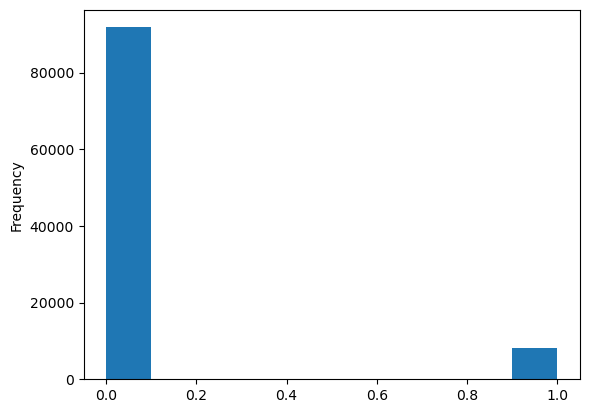

In [9]:
# Define target vector
y = data_df["TARGET"]
y.astype(int).plot.hist()

In [10]:
X=data_df.drop("TARGET", axis=1)
y = data_df["TARGET"].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [14]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
model = RandomForestClassifier(n_estimators=500, random_state=78)

In [17]:
# Train the model
model = model.fit(X_train_scaled,y_train)

/Users/Love/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [18]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [19]:
# Accuracy Score
acc_score = accuracy_score(y_test,predictions)
print(f"{acc_score:.2f}")

0.92


In [20]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [21]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,22942,50
Actual 1,2001,7


Accuracy Score : 0.91796
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22992
           1       0.12      0.00      0.01      2008

    accuracy                           0.92     25000
   macro avg       0.52      0.50      0.48     25000
weighted avg       0.86      0.92      0.88     25000



In [ ]:
import joblib
# Save the model to a file using joblib
joblib.dump(model, 'model_final.joblib')